In [2]:
# settings
%pylab inline
import scipy, scipy.stats
pylab.rcParams['figure.figsize'] = (8.0, 4.0)
#from IPython.html.widgets import interact, fixed
# import ipywidgets
from __future__ import print_function

Populating the interactive namespace from numpy and matplotlib


$\usepackage{amssymb} \newcommand{\R}{\mathbb{R}} \newcommand{\vx}{\vec{x}}$

# 3. Dimensionality Reduction

In most of the application cases of data mining, we deal with high-dimensional data.

** Examples: **
* the production process of a certain type of semiconductor circuit encompasses about 50 parameters.
 * how does the chip quality depend on these? $\to$ search for patterns & regularities in a 50d space.
* buying behavior of customes: 
 * every product of a warehouse ($\approx o(2000)$) can be regarded as a dimension. 
 * The data vector is the number of jointly bought articles, a sparse high-dimensional vector.

** Wanted**: Methods for the reduction of the number of involved dimensions, e.g. by identification of irrelevant or neglectable variables or by creating variable combinations that simplify or enable the treatment of such situations.

## 3.1. Geometry of highdimensional spaces

### 3.1.1. High-dimensional volume

Consider the volume of two nested hypercubes in $\R^d$.

<img src="images/cube.png" width="30%">

volume ratio: since $V = $ (length of edge)$^d$
$$
	\frac{(1-2\epsilon)^d}{1^d}=(1-2\epsilon)^d\approx e^{-2d\epsilon}
$$

**Result**:
* volume ratio decreases exponentially with increasing epsilon
* for a layer thickness of $\epsilon = 1/d$, we have a decrease down to approx. 15% ($= 1/e^2$)
* $\Rightarrow$ in high-dimensional spaces is almost the complete volume concentrated in a tiny film at the surface.

That illustrates: our intuition is often just wrong when it comes to high-dimensional spaces.

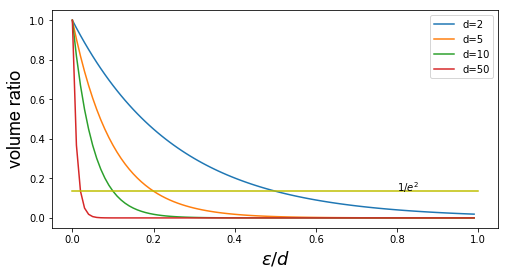

In [4]:
epsoverD = arange(0, 1, 0.01)
for d in [2, 5, 10, 50]:
    plot(epsoverD, exp(-2*epsoverD*d), "-", label=("d=%d" % (d)))
plot([0,1], array([1,1])*exp(-2), "y"); text(0.8, exp(-2), "$1/e^2$")
myfont= {'fontname': 'Arial', 'size': 18}
xlabel('$\epsilon/d$', **myfont); ylabel('volume ratio', **myfont) 
legend();

**Example**: ** high-dimensional normal distribution. **
* according to the density function the highest density is around the mean.
* In the $\sigma=\sqrt{Var(\cal N)}$ ball around the mean we find in the 1d-case approx. 70% of the probability mass.
$$ P_\sigma(d=1) = \int\limits_{-\sigma}^{\sigma} P(x) dx \approx 0.7 $$
* With increasing dimensionality $P_\sigma$ decreases
 * $P_\sigma(d=20) \approx 0.02$, which means that with 98% probability a randomly drawn point falls outside the $\sigma$-sphere.

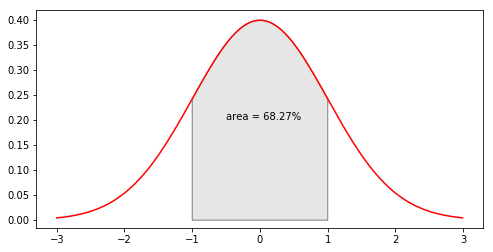

In [5]:
fig, ax = plt.subplots()
x = arange(-3, 3, 0.01)
plot(x, scipy.stats.norm.pdf(x), "r-")
x = linspace(-1, 1)
y = scipy.stats.norm.pdf(x)
verts = [(-1, 0)] + list(zip(x, y)) + [(1, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
text(-.5, 0.2, 'area = 68.27%')
ax.add_patch(poly);

### 3.1.2. Obtainable sampling density

Assume we draw $N$ random data points in the $d$-dimensional unit cube.

What average distance $r(N,d)$ do we get? i.e. what is the typical neighborfree perimeter around a point in $\R^d$?

<img src="images/volume-sampling.png" width="30%">

Estimation: 
* around each point we have a neighbor-free volume $V$ of $V\approx r(N,d)^d$.
* With $N \cdot V \approx 1$ we see (using $V \approx 1/N$ and isolating $r$ in the above equation)
$$ 
	r(N,d) \approx \left( \frac{1}{N}\right)^{\frac{1}{d}} = N^{-\frac{1}{d}} = \frac{1}{\sqrt[d]{N}}
$$

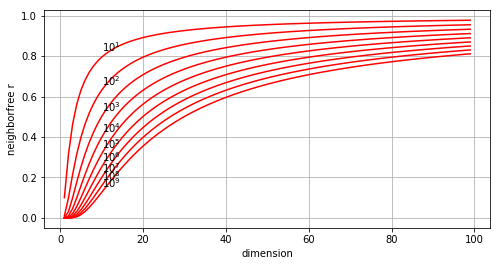

In [6]:
d = arange(1, 100, 1) # see 400 instead of 40 and realize how hopeless sampling is
def nbfreer(N=100, d=1): return (1.0/N)**(1.0/d)
[ plot(d, nbfreer(N, d), "r-") for N in 10.0**arange(1, 10, 1) ]
[ text(10, nbfreer(10**Ne, 10)+0.025, '$10^{%s}$' % (Ne)) for Ne in arange(1,10,1)];
xlabel("dimension"); ylabel("neighborfree r"); grid();

**Result**:
* A dense sampling is at best possible for $d \leq 5\dots 8$
* In high-dimensional spaces, two samples along each dimension are already a lot: ($2^d$)
* High-dimensional spaces are extremely unsuitable for exploration and for finding regularities
 * this is called the __curse of dimensionality__.

[ws17EOT20171122]

## 3.2 Embedding vs. Intrinsic Dimensionality

Most of the $d$-dimensional data do not fill a $d$-dimensional volume at all!

Typical situation:

$q$-dimensional manifold in a $d$-dimensional embedding space
* structure is a distorted part of a $\R^q$ in $\R^d$.

** discriminate manifolds and subspaces **
* subspaces are spanned by a set of vectors $\left\{\vec{u}_i \right\}, i=1\dots q$
* Each linear combination is element of the subspace.

<img src="images/generative-model.png" width="20%">
(Figure above depicts a data distribution which is concentrated along a low-dimensional manifold $q<d$ of the $\R^d$.

** Example:** 
* Consider camera images (100x100=10000 pixel) of one and the same (however: rotated and translated) object.
* Each of $N$ images is a point in $\R^{10000}$ (embedding space)
* The underlying degrees of freedom are 3 translations and rotations (x,y,z-axis)
* Understand that infinitesimal changes of a parameter yields an infinitesimal change of the vector: 
 * a dimension is mapped to a curve in embedding space 
 * varying two parameters yields a 'deformed surface' in embedding space
 * etc.

**Conclusion**:

We have to discriminate
* embedding space dimensionality $d$
 * number of parameters that are used to describe an item in the data set
 * depends upon representation of data
* intrinsic data dimensionality $q$
 * the minimal number of independently variable parameters that determine a data set
 * problem specific 
* $\Rightarrow$ structure usually implies $q\ll d$.
* sensor noise may to some degree add a $\R^d$ jitter.

**Examples**: 

* aerial images of buildings: description dimensionality $\approx 10^5...10^6$
 * intrinsic dimensionality $\approx 10^2...10^3$.

* Postures of a human hand: $\approx 20$ joints (i.d. embedding dim. $d=20$).
 * if we assume only 3 values per joint we obtain $3^{20} \approx 3\cdot 10^9$ postures
 * larger than the life expectancy of humans in seconds!
 * Necessarily we realize only a tiny fraction of them in our lives.
 
**Summary**:
* Prevalence of a hidden structure manifests often as $q\ll d$. 
* Goal of dimensionality reduction is to reach a new representation with $d'$ dimensions, $d'<d$, which comes closer to $q$.


### Model:
Explanation of data by a _**generative model**_
$$
X = f(Y) + R
$$
where 
* $X\in \R^d$ are measurements (random variables)
* $Y\in \R^q$ are _latent_ (hidden) variables
* $R\in \R^d$ describes additive noise, e.g. sensor noise
* $f: \R^q \to \R^d$ is a functional mapping from latent variables and the observed features.

Often we are both interested in uncovering latent variables as well as the model $f$.


<begin of 2015-12-09>

## 3.3 Fractal Dimension

* The embedding of data in feature space can also exhibit the structure of a fractal set.
* A fractal set is characterized by a non-integer dimension.

### 3.3.1 Correlation Dimension $d_C$

One way to define a dimensionality measure for a set $M$ is to start from the statistic of distances between pairs of data points in a random set of $N$ data points.

Let's assume a random variable in $\R^d$ with uniform density $\rho$.

In a small $\epsilon$-ball around any point of the sample, we expect
$$
c(\epsilon) = \rho\cdot\epsilon^d
$$
data points, where $d$ is the dimensionality of $M$ (embedding dimension)

The total number $C(\epsilon)$ of distances $\le \epsilon$ in the sample is therefore:

$$ C(\epsilon) = N\rho\cdot\epsilon^d $$
$$\Leftrightarrow \log C(\epsilon) = \text{const} + d\cdot\log\epsilon $$

* $C(\epsilon)$ can be computed by simple counting
* Plotting $\log(C(\epsilon))$ against $\log(\epsilon)$ allows to derive $d$ as the slope of the approximative functional dependency towards the smallest values of $\epsilon$.
* The so-defined dimension $d=d_C$ is called **correlation dimension**.

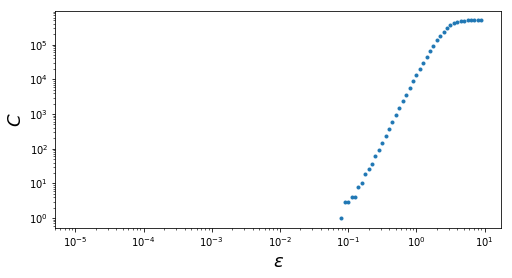

In [8]:
# try dim = 1,2,3,4
dim=4
data = randn(1000, dim) 

def dist_mat(data):
    dist_mat = zeros((data.shape[0], data.shape[0]))
    for i in arange(dist_mat.shape[0]):
        for j in arange(i + 1): # don't compute the distances twice
            row_i = data[i, :]
            row_j = data[j, :]
            diff = row_i - row_j 
            dist = sqrt(dot(diff, diff))
            dist_mat[i, j], dist_mat[j, i] = dist, dist
    return dist_mat

# total number of distances less or equal to eps 
def C(dist_mat, eps):
    s = ((dist_mat <= eps) * 1).sum()
    return (s - dist_mat.shape[0]) / 2

dist_mat = dist_mat(data)
epsilons = 10**arange(-5, 1, 0.05)
#epsilons = arange(0, 10, 0.01) # alternative
Cs = zeros((epsilons.shape[0]))
for i, eps in enumerate(epsilons):
    Cs[i] = C(dist_mat, eps)
plot(epsilons, Cs, ".")
myfont= {'fontname': 'Arial', 'size': 18}
loglog(); xlabel('$\epsilon$', **myfont); ylabel('$C$', **myfont);

### 3.3.2. Hausdorff Dimension $d_H$


A different way to define a dimension measure is by counting the minimal number $N(\epsilon)$
of pairwise disjunct hypercubes of edge length $\epsilon$ that are required to obtain a complete covering of $M$.

For $\epsilon \to 0$ we expect the scaling law
$$ 
N(\epsilon) \propto \epsilon^{-d}
$$
from which we obtain
$$
d_H = \lim \limits_{\epsilon\to 0} \frac{\log N(\epsilon)}{\log\left(\frac{1}{\epsilon}\right)}
$$
$d_H$ is called **Hausdorff dimension** of the set $M$.
* again: the plot of $\log(N)$ against $\log(\epsilon)$ gives us access to $d_H$ as the slope towards small $\epsilon$.

**Remarks**:
* Many real-world data sets yield non-integer (and often different) values for $d_C$ and $d_H$.
* Example: the distribution of street crossings in the USA yields 
 * $d_H\approx 1.7$, 
 * $d_C\approx 1.5 \ldots1.7$, 
 * i.e. the distribution of street crossings is of fractal nature 'between line- and surface-like'
* $d_C, d_H$ provide orientation for the choice of parameters in machine learning, e.g. topology of a self-organizing map,  etc.

[ws17EOT20171129]